In [2]:
import mne
import pandas as pd
import tools.helpers
import os 
import numpy as np


from config import Config
configObj = Config()
configss = configObj.getConfigSnapshot()


In [106]:
# read the raw file
participant_id = 11
participant_name = 'P' + str(participant_id)
partipant_data_path =  participant_name + '/' + participant_name +'.gdf'
path = os.path.join(configss['root'], configss['data_dir'] , partipant_data_path ) 
print(path)
raw  = mne.io.read_raw_gdf(path, preload=True)

# add filtering


c:\Users\erang\Desktop\Oddball\ov_experiment/scenarios/data\P11/P11.gdf
Extracting EDF parameters from c:\Users\erang\Desktop\Oddball\ov_experiment\scenarios\data\P11\P11.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
1Z, 2Z, 3Z, 4Z, 6Z, 7Z, 8Z, 9Z, 1L, 2L, 3L, 4L, 5L, 6L, 7L, 8L, 9L, 10L, 11L, 1R, 2R, 3R, 4R, 5R, 6R, 7R, 8R, 9R, 10R, 11R, 1LA, 2LA, 3LA, 1LB, 2LB, 3LB, 4LB, 5LB, 1LC, 2LC, 3LC, 4LC, 5LC, 1LD, 2LD, 3LD, 4LD, 1RA, 2RA, 3RA, 1RB, 2RB, 3RB, 4RB, 5RB, 1RC, 2RC, 3RC, 4RC, 5RC, 1RD, 2RD, 3RD, 4RD, Tgt, SC
Creating raw.info structure...
Reading 0 ... 120319  =      0.000 ...   240.638 secs...


In [3]:
path = os.path.join(configss['root'], configss['electrode_layout_path'])

In [22]:
neonatal_montage = mne.channels.read_custom_montage(path)

C:\Users\erang\AppData\Local\Temp\ipykernel_24832\2584731813.py:1: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  fig1 = neonatal_montage.plot(sphere=(0.00, -0.0355, 0.00, 0.125))


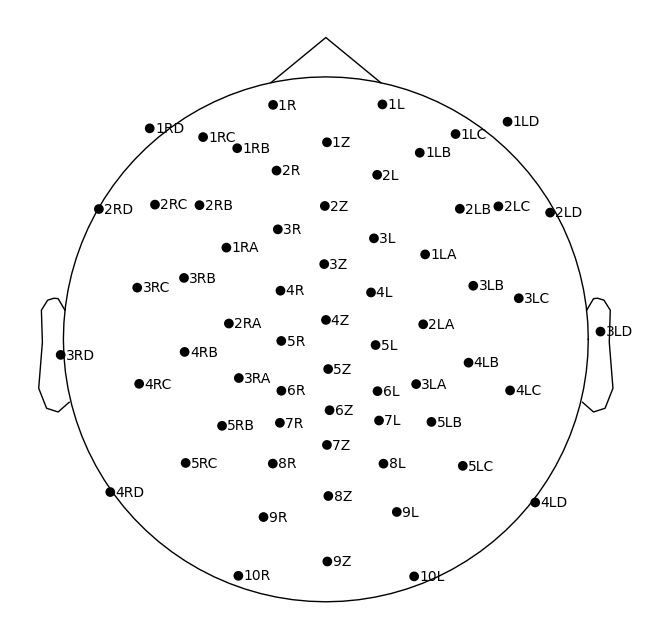

In [48]:
fig1 = neonatal_montage.plot(sphere=(0.00, -0.0355, 0.00, 0.125))  

In [15]:
import matplotlib.pyplot as plt

# https://mne.discourse.group/t/montage-correction-for-misplaced-cap/3520/8

In [13]:
import vg
import scipy
from scipy.spatial.transform import Rotation as R
import mne
import logging


import vg
import numpy as np
import scipy
from scipy.spatial.transform import Rotation as R
import mne
import logging


def rotate_montage_with_misplaced_channel(intended_channel_str: str, 
                                          actual_channel_str: str, 
                                          montage: mne.channels.DigMontage, 
                                          exclude=[]) -> mne.channels.DigMontage:
    '''
    Corrects a montage by artificially rotating all electrode coordinates
    '''
    log = logging.getLogger(__name__)

    
    # Save all the fiducials
    coord_frame = montage.get_positions()['coord_frame']
    nasion = montage.get_positions()['nasion']
    lpa = montage.get_positions()['lpa']
    rpa = montage.get_positions()['rpa']
    hsp = montage.get_positions()['hsp']
    hpi = montage.get_positions()['hpi']

    
    # retrieve the x,y,z position of the channels
    A_intended = montage.get_positions()['ch_pos'][intended_channel_str]
    B_actual = montage.get_positions()['ch_pos'][actual_channel_str]
    
    # get the x and y locations for the rotation, ignore Z
    angle_between_ch = [vg.signed_angle(A_intended, B_actual, look=vg.basis.x, units='rad'), 
                        vg.signed_angle(A_intended, B_actual, look=vg.basis.y, units='rad'), 
                        0]
    
    # Define the rotation on X and Y
    rot = R.from_rotvec(angle_between_ch)
    log.warning(f'Rotating coordinates using the angle between {intended_channel_str} to {actual_channel_str} as a reference {angle_between_ch} Rad')
    
    # create an empty matrix for storing new electrode positions
    new_pos = np.zeros((len(montage.ch_names), 3), np.float32)
    
    # Loop on all electrode locations
    for ch_name, ch_idx in zip(montage.ch_names, list(range(len(montage.ch_names)))):
        if ch_name not in exclude:
            # rotate them
            new_pos[ch_idx,:] = rot.apply(montage.dig[ch_idx]['r'])
            old = montage.dig[ch_idx]['r']
            new = rot.apply(montage.dig[ch_idx]['r'])
            #print(f'old:{old}, new:{new}')
            
            # keep the values
            #new_pos[ch_idx,:] = montage.dig[ch_idx]['r']
    
    # apply the values in a new montage
    montage_out = mne.channels.make_dig_montage(ch_pos=dict(zip(montage.ch_names, new_pos)), 
                                                coord_frame = coord_frame,
                                                nasion = nasion,
                                                lpa = lpa,
                                                rpa = rpa,
                                                hsp = hsp,
                                                hpi = hpi)
    
    # alters and return the montage
    return montage_out

In [10]:
import vg
import scipy
from scipy.spatial.transform import Rotation as R
import mne
import logging


import vg
import numpy as np
import scipy
from scipy.spatial.transform import Rotation as R
import mne
import logging


def rotate_montage_90deg( montage: mne.channels.DigMontage, 
                                          exclude=[]) -> mne.channels.DigMontage:
    '''
    Corrects a montage by artificially rotating all electrode coordinates
    '''
    log = logging.getLogger(__name__)

    
    # Save all the fiducials
    coord_frame = montage.get_positions()['coord_frame']
    nasion = montage.get_positions()['nasion']
    lpa = montage.get_positions()['lpa']
    rpa = montage.get_positions()['rpa']
    hsp = montage.get_positions()['hsp']
    hpi = montage.get_positions()['hpi']

    

    # get the x and y locations for the rotation, ignore Z
    angle_between_ch = [0, 0, 90]
    
    # Define the rotation on X and Y
    rot = R.from_rotvec(angle_between_ch)
    
    # create an empty matrix for storing new electrode positions
    new_pos = np.zeros((len(montage.ch_names), 3), np.float32)
    
    # Loop on all electrode locations
    for ch_name, ch_idx in zip(montage.ch_names, list(range(len(montage.ch_names)))):
        if ch_name not in exclude:
            # rotate them
            new_pos[ch_idx,:] = rot.apply(montage.dig[ch_idx]['r'])
            old = montage.dig[ch_idx]['r']
            new = rot.apply(montage.dig[ch_idx]['r'])
            #print(f'old:{old}, new:{new}')
            
            # keep the values
            #new_pos[ch_idx,:] = montage.dig[ch_idx]['r']
    
    # apply the values in a new montage
    montage_out = mne.channels.make_dig_montage(ch_pos=dict(zip(montage.ch_names, new_pos)), 
                                                coord_frame = coord_frame,
                                                nasion = nasion,
                                                lpa = lpa,
                                                rpa = rpa,
                                                hsp = hsp,
                                                hpi = hpi)
    
    # alters and return the montage
    return montage_out

C:\Users\erang\AppData\Local\Temp\ipykernel_24832\895193013.py:3: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  mnt.plot()


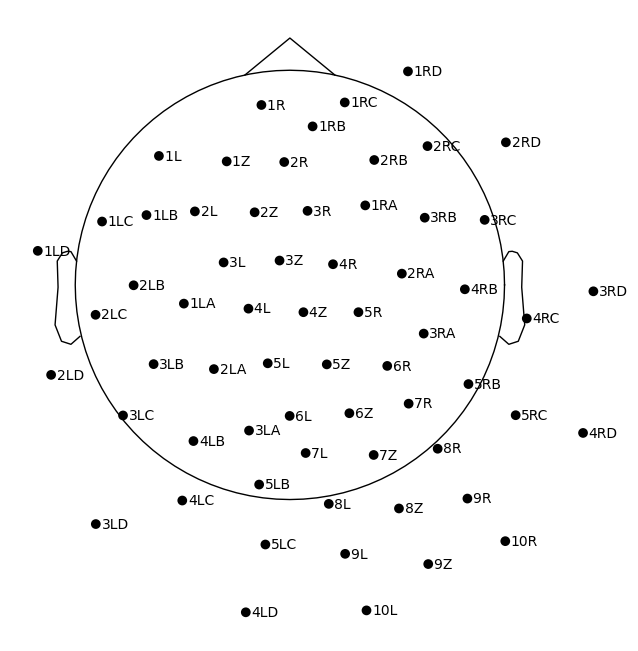

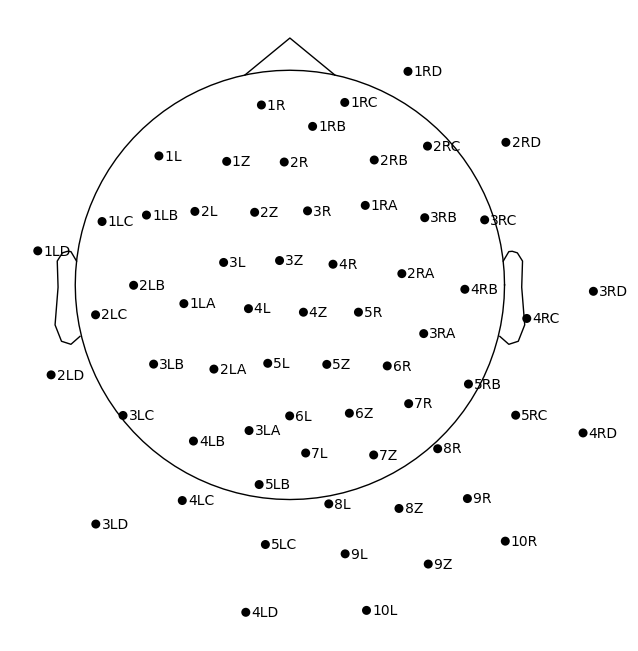

In [11]:
mnt = rotate_montage_90deg( montage= neonatal_montage)

mnt.plot()

C:\Users\erang\AppData\Local\Temp\ipykernel_24832\366799786.py:1: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  fig1 = neonatal_montage.plot()


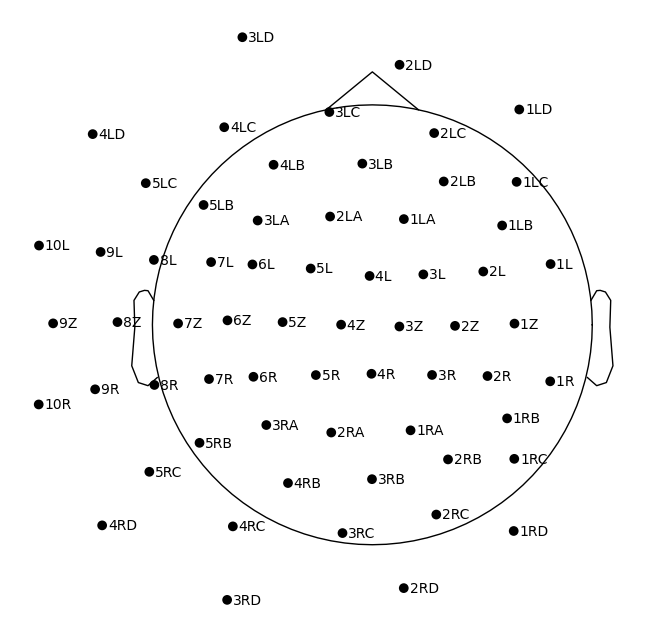

In [12]:
fig1 = neonatal_montage.plot()  

Rotating coordinates using the angle between 3LB to 1Z  as a reference [1.2256862047306225, 1.202759194097513, 0] Rad
C:\Users\erang\AppData\Local\Temp\ipykernel_24832\44105725.py:5: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  mnt.plot()


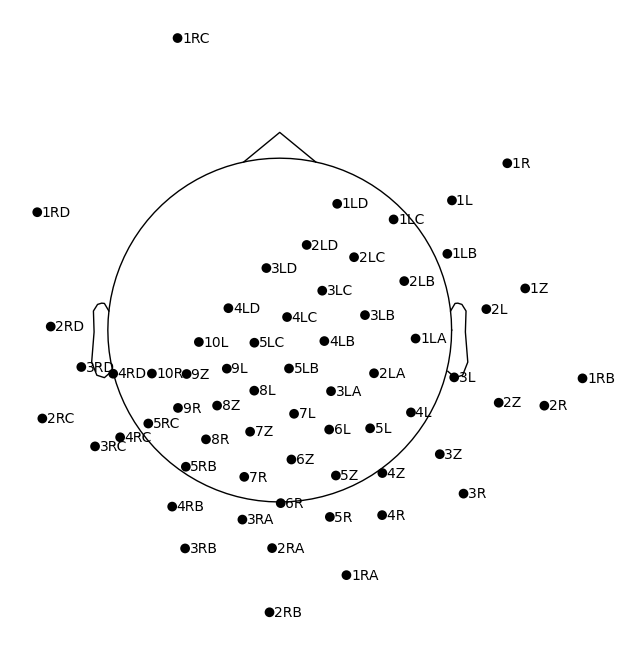

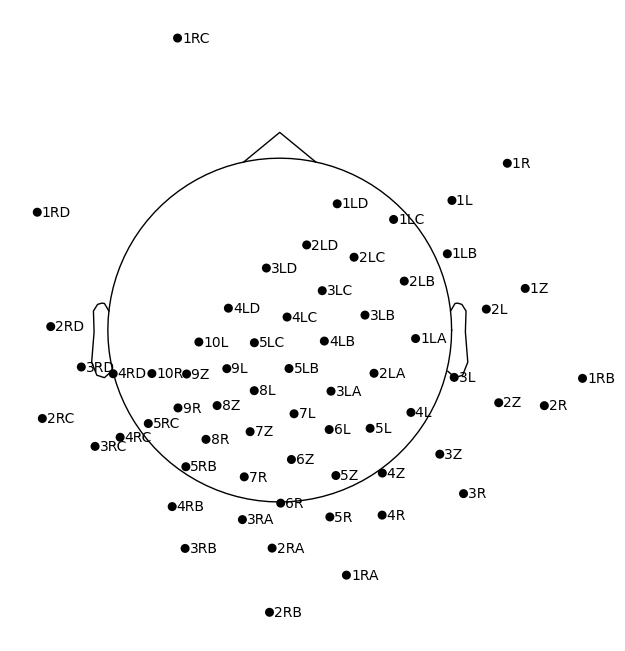

In [18]:
mnt = rotate_montage_with_misplaced_channel(intended_channel_str='3LB', 
                                          actual_channel_str='1Z ', 
                                          montage= neonatal_montage)

mnt.plot()